<a href="https://colab.research.google.com/github/NguyenSLam/Artificial-Intelligence/blob/main/Facemembersofclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [24]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/Facemembersofclass_Data/Train/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('THOA'):
    output= 1.0
  if file.startswith('HUNG'):
    output= 2.0
  if file.startswith('QUYET'):
    output= 3.0
  if file.startswith('PHONG'):
    output= 4.0
  if file.startswith('QUAN'):
    output= 5.0
  if file.startswith('LAM'):
    output= 6.0
  if file.startswith('NHAT'):
    output= 7.0    
  if output != 0.0:
        photo = load_img(folder + file, target_size=(200, 200, 3))
        photo = img_to_array(photo)
        photos.append(photo)
        labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/Facemembersofclass_photos', photos)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/Facemembersofclass_labels', labels)

(294, 200, 200, 3) (294,)
(294, 200, 200, 3) (294,)


In [25]:
#chia 10% dữ liệu cho tập kiểm tra và 90% còn lại cho tập huấn luyện.
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]
print(test_x.shape, train_x.shape)

(29, 200, 200, 3) (265, 200, 200, 3)


In [27]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((265, 200, 200, 3))
train_x = train_x.astype('float32')/255
test_x = test_x.reshape((29, 200, 200, 3))
test_x = test_x.astype('float32')/255

In [29]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,8)
test_y = to_categorical(test_y,8)

In [30]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(265, 200, 200, 3)
(29, 200, 200, 3)
(265, 8)
(29, 8)


In [31]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam,SGD
from keras import losses
loss = losses
batch_size = 64
epochs = 20
classes = 8

In [32]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))

In [33]:
# biên dịch mô hình CNN 
#model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])
#Compile:
from keras.losses import categorical_crossentropy
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(train_x, train_y)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

Epoch 1/20
5/5 [==============================] - 1s 176ms/step - loss: 1.9758 - accuracy: 0.2792
Epoch 2/20
5/5 [==============================] - 0s 74ms/step - loss: 1.7668 - accuracy: 0.3585
Epoch 3/20
5/5 [==============================] - 0s 77ms/step - loss: 1.6532 - accuracy: 0.3660
Epoch 4/20
5/5 [==============================] - 0s 79ms/step - loss: 1.5098 - accuracy: 0.4755
Epoch 5/20
5/5 [==============================] - 0s 75ms/step - loss: 1.3187 - accuracy: 0.6038
Epoch 6/20
5/5 [==============================] - 0s 74ms/step - loss: 1.1156 - accuracy: 0.6566
Epoch 7/20
5/5 [==============================] - 0s 74ms/step - loss: 0.8665 - accuracy: 0.7170
Epoch 8/20
5/5 [==============================] - 0s 75ms/step - loss: 0.6592 - accuracy: 0.8302
Epoch 9/20
5/5 [==============================] - 0s 76ms/step - loss: 0.4164 - accuracy: 0.9094
Epoch 10/20
5/5 [==============================] - 0s 74ms/step - loss: 0.4368 - accuracy: 0.8604
Epoch 11/20
5/5 [===========

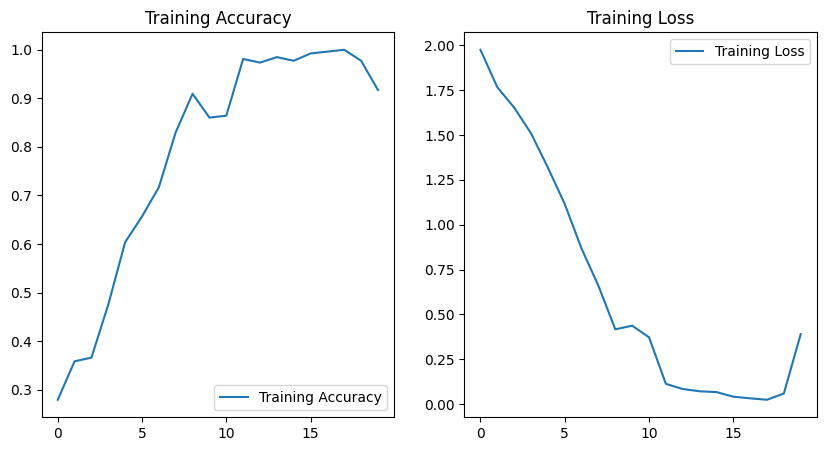

In [34]:
# Vẽ biểu đồ độ chính xác và độ mất mát của mô hình trong quá trình huấn luyện
acc = train.history['accuracy']
loss = train.history['loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [35]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/Facemembersofclass.h5')

In [36]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model=load_model("/content/drive/MyDrive/Colab Notebooks/Data/Facemembersofclass.h5")

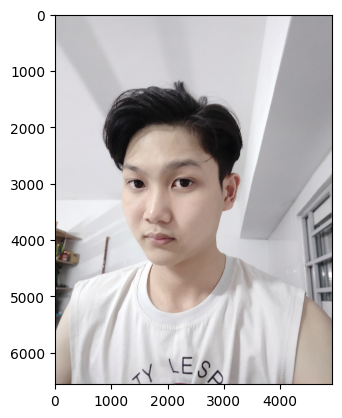

1/1 [==============================] - 0s 75ms/step
Đây là  QUAN [7.7106283e-16 3.2299929e-06 7.3599735e-09 1.3378427e-05 6.0875034e-05
 1.7614859e-04 9.9974209e-01 4.2631273e-06]
0.9997421


In [37]:
class_name = ["LAM","PHONG","NHAT","QUYET","HUNG","THOA","QUAN",""]
img1=load_img('/content/drive/MyDrive/AI_Picture/Facemembersofclass_Data/Test/LAM325.jpg')
plt.imshow(img1)
plt.show()
img1=load_img('/content/drive/MyDrive/AI_Picture/Facemembersofclass_Data/Test/LAM325.jpg',target_size=(200,200))
img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("Đây là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

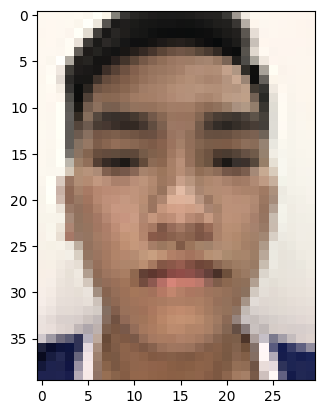

1/1 [==============================] - 0s 27ms/step
Đây là  NHAT [3.4945278e-13 3.8558438e-11 9.9835855e-01 4.5930349e-08 1.5938750e-07
 9.7778488e-09 1.2458277e-08 1.6412144e-03]
0.99835855


In [42]:
img2=load_img('/content/drive/MyDrive/AI_Picture/Facemembersofclass_Data/Test/HUNG (62).png')
plt.imshow(img2)
plt.show()
img2=load_img('/content/drive/MyDrive/AI_Picture/Facemembersofclass_Data/Test/HUNG (62).png',target_size=(200,200))
img2=img_to_array(img2)
img2=img2.reshape(1,200,200,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
print("Đây là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))